In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac
from sklearn import tree
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [15]:
cls=[]
for i in range(0,df.shape[0]):
    if df["Taxable.Income"][i]<= 30000:
        cls.append('Risky')
    else:
        cls.append('Good')
df['Class']=cls

In [21]:
df.tail(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Class
590,NO,Married,43018,85195,14,YES,Good
591,YES,Single,27394,132859,18,YES,Risky
592,YES,Single,68152,75143,16,NO,Good
593,NO,Divorced,84775,131963,10,YES,Good
594,NO,Married,47364,97526,9,YES,Good
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good
599,NO,Divorced,96519,158137,16,NO,Good


In [61]:
lblencoder=LabelEncoder()
df['Class']=lblencoder.fit_transform(df["Class"])
df['Undergrad']=lblencoder.fit_transform(df["Undergrad"])
df['Marital.Status']=lblencoder.fit_transform(df["Marital.Status"])
df['Urban']=lblencoder.fit_transform(df["Urban"])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Class
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [62]:
x=df.iloc[:,:6]
y=df.iloc[:,6]

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True)

In [64]:
model = DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [65]:
y_pred= model.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [69]:
ac(y_test,y_pred)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Class
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


[Text(279.0, 407.70000000000005, 'Taxable.Income <= 30055.5\ngini = 0.331\nsamples = 420\nvalue = [332, 88]\nclass = Good'),
 Text(139.5, 135.89999999999998, 'gini = 0.0\nsamples = 88\nvalue = [0, 88]\nclass = Risky'),
 Text(418.5, 135.89999999999998, 'gini = 0.0\nsamples = 332\nvalue = [332, 0]\nclass = Good')]

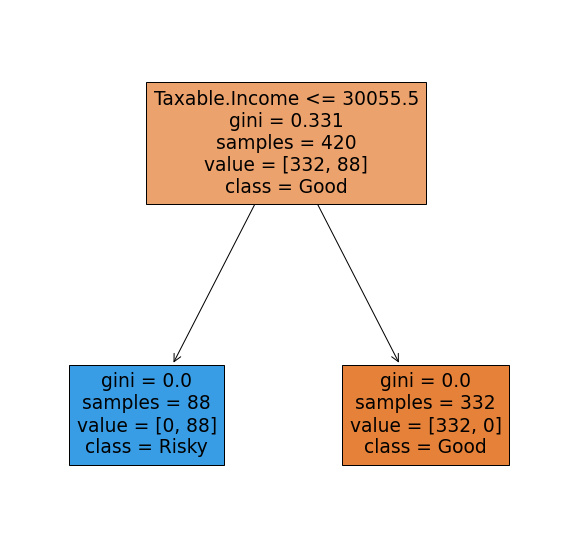

In [71]:
plt.figure(figsize=(10,10))
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn = ['Good','Risky']
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)